In [1]:
import numpy as np

In [2]:
class Percepton(object):
    #--Параметры--
    #eta - скорость обучения (между 0. и 1.0)
    #ite - Проходы по обучающему набору данных.
    #rand_state - Начальное начение генератора случайных чисел для инициализации 
    #случайными весами.
    #--Атрибуты--
    #w - одномерный массив Веса после подгонки.
    #для инициализации случайными весами.
    #errors - список Количество неправильных классификаций (обновлений) в каждой эпохе.
    def __init__(self, eta=0.01, ite=50, rand_state=1):
        self.eta = eta
        self.ite = ite
        self.rand_state = rand_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.rand_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.ite):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
v = np.array([1,2,3])

In [4]:
v1 = 0.5 * v

In [5]:
np.arccos(v.dot(v1) / (np.linalg.norm(v) * np.linalg.norm(v1)))

0.0

Здесь
np. arccos -
тригонометрический арккосинус, а
np.linalg.
функция, вычисляющая длину вектора (наше решение извлекать
случайные числа из нормального распределения, а не, например, равномер­
ного, и выбор стандартного отклонения О.01
было чисто произвольным; 
не забывайте, что нас всего лишь интересуют небольшие случайные значения,
чтобы не иметь дела с особенностями векторов, содержащих все нули, как
обсуждалось ранее.)

In [6]:
import os

In [7]:
import pandas as pd

In [8]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [9]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [10]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
import matplotlib.pyplot as plt

In [12]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [13]:
X = df.iloc[0:100, [0, 2]].values

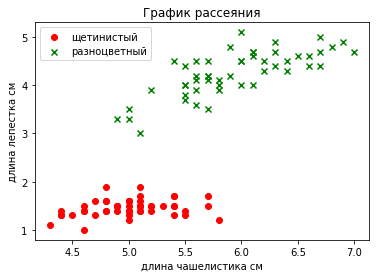

In [14]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='green', marker='x', label='разноцветный')
plt.xlabel('длина чашелистика см')
plt.ylabel('длина лепестка см')
plt.legend(loc='upper left')
plt.title('График рассеяния')
plt.show()

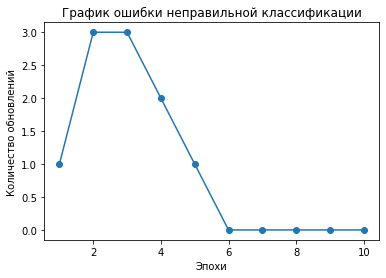

In [15]:
ppn = Percepton(eta=0.1, ite=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1),
        ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.title('График ошибки неправильной классификации')
plt.show()

In [16]:
from matplotlib.colors import ListedColormap
def plot_dec_reg(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '4', 'a')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1, 0],
                   y=X[y==c1, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=c1,
                   edgecolor='black')

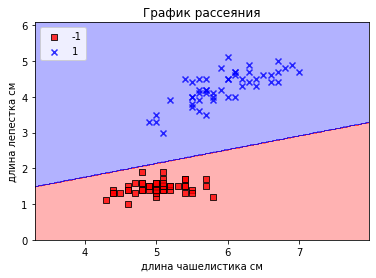

In [17]:
plot_dec_reg(X, y, classifier=ppn)
plt.xlabel('длина чашелистика см')
plt.ylabel('длина лепестка см')
plt.legend(loc='upper left')
plt.title('График рассеяния')
plt.show()

In [18]:
class Adaline(object):
    def __init__(self, eta=0.01, ite=50, rand_state=1):
        self.eta = eta
        self.ite = ite
        self.rand_state = rand_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.rand_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.ite):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

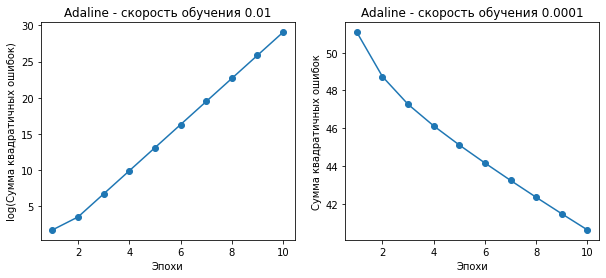

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adaline(ite=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма квадратичных ошибок)')
ax[0].set_title('Adaline - скорость обучения 0.01')
ada2 = Adaline(ite=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('Сумма квадратичных ошибок')
ax[1].set_title('Adaline - скорость обучения 0.0001')
plt.show()

In [20]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

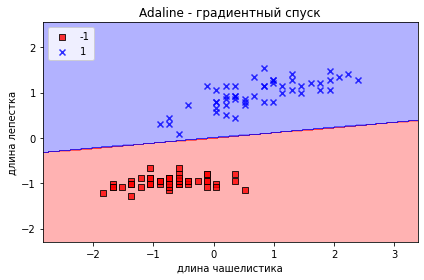

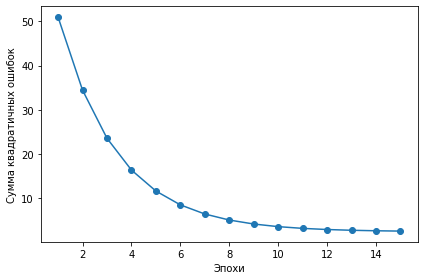

In [21]:
ada_gd = Adaline(ite=15, eta=0.01)
ada_gd.fit(X_std, y)
plot_dec_reg(X_std, y, classifier=ada_gd)
plt.title('Adaline - градиентный спуск')
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_)+1), ada_gd.cost_,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Сумма квадратичных ошибок')
plt.tight_layout()
plt.show()